In [24]:
# 整理好，看起来舒服，顺序正确

# 设置一下 xy 的字体？大一点

# 对 cola_nstep20, cola_512grid 也画一下

# 结果图输出成文件，存档保存

# 找一下 cola 测试的文章？好像有篇 WiggleZ mock 的文章提到过，mass function 有差距，需要修正。。。看看他们的修正能不能解释    

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%pylab inline

def plot_difference(X1,X2,Y1,Y2):
    fig = plt.figure(figsize=(12,4))
    ax = fig.add_subplot(111)
    Xs, rats= [], []
    for row in range(len(X1)):
        if Y1[row]>0 and Y2[row]>0:
            rat = Y2[row] / Y1[row]
            #print X1[row], rat
            Xs.append(X1[row]); rats.append(rat)
    ax.plot(Xs, rats)
    ax.grid()
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    ax.set_xlabel('log10 mass', fontsize=18); ax.set_ylabel('Ratio', fontsize=18)
    ## 美化一下。。。
    # plt.savefig(r'difference.pdf', format='pdf')
    plt.show()
    # plt.savefig(r'difference'.pdf, format='pdf')

Populating the interactive namespace from numpy and matplotlib


### Load in data

In [2]:
bigmd_masscol = 6
bigmd_lowmasscol = 7
cola_masscol = 0

bigmd_mass = np.loadtxt('/home/xiaodongli/data/BigMDPL_mge1e13/BigMDPL_mge1e13.csv.snap79', usecols=bigmd_masscol)
bigmd_mass_low = np.loadtxt('/home/xiaodongli/projects/cf_pks/BigMD/csvs/BigMDPL_z0.csv', delimiter=',',usecols=bigmd_lowmasscol)
cola_mass = np.loadtxt('/home/xiaodongli/projects/simulation/cola_output/fof00001c.txt', usecols=cola_masscol)
cola_mass_512grid = np.loadtxt('/home/xiaodongli/projects/simulation/cola_output_512grid/fof00001c.txt', usecols=cola_masscol)
cola_mass_nstep5 = np.loadtxt('/home/xiaodongli/projects/simulation/cola_output_nstep5/fof00001c.txt', usecols=cola_masscol)
cola_mass_nstep20 = np.loadtxt('/home/xiaodongli/projects/simulation/cola_output_nstep20//fof00001c.txt', usecols=cola_masscol)
cola_mass_nstep40 = np.loadtxt('/home/xiaodongli/projects/simulation/cola_output_nstep40//fof00001c.txt', usecols=cola_masscol)
cola_mass_nstep80 = np.loadtxt('/home/xiaodongli/projects/simulation/cola_output_nstep80//fof00001c.txt', usecols=cola_masscol)
cola_mass_nstep1000 = np.loadtxt('/home/xiaodongli/projects/simulation/cola_output_nstep1000//fof00001c.txt', usecols=cola_masscol)

In [3]:
cola_degraded_mass = np.loadtxt('/home/xiaodongli/projects/simulation/cola_output/fof00001c.nbar-4.7e-4', usecols=cola_masscol)
cola_degraded_mass_nstep40 = np.loadtxt('/home/xiaodongli/projects/simulation/cola_output_nstep40/fof00001c.nbar-4.7e-4', usecols=cola_masscol)
cola_degraded_mass_nstep80 = np.loadtxt('/home/xiaodongli/projects/simulation/cola_output_nstep80/fof00001c.nbar-4.7e-4', usecols=cola_masscol)
cola_degraded_mass_nstep1000 = np.loadtxt('/home/xiaodongli/projects/simulation/cola_output_nstep1000/fof00001c.nbar-4.7e-4', usecols=cola_masscol)

In [4]:
 ### Mass of particle

In [5]:
c = 2.99792458e8
pi = 3.1415926535897932384626433832795 
G=6.67428e-8                                                     # unit: cm^3/(g*s^2)
Mpc = 3.085677e24                                                # unit: cm
h  = 0.6777                                                    
omega_m = 0.307115
boxsize = 1024.0                                                 # unit: Mpc
nc  =  1024                               
Solar_mass = 1.98892e33                                          # unit: g

In [6]:
H0 = 100*100000                                                # unit: cm/(s*Mpc)
rhoc = 3 * H0**2 / (8*pi * G * Mpc**2)                           # unit: g/cm^3

Volume = (boxsize * Mpc)**3                                      # unit: cm^3

m_particle = rhoc * omega_m * Volume / (nc**3)                   # unit : g
m_particle_to_solar = m_particle / Solar_mass



In [7]:
print m_particle_to_solar/10**13

0.00852140388498


### Plot the histograms: cola, 10 timesteps, 1024 box, 1024**3 particles

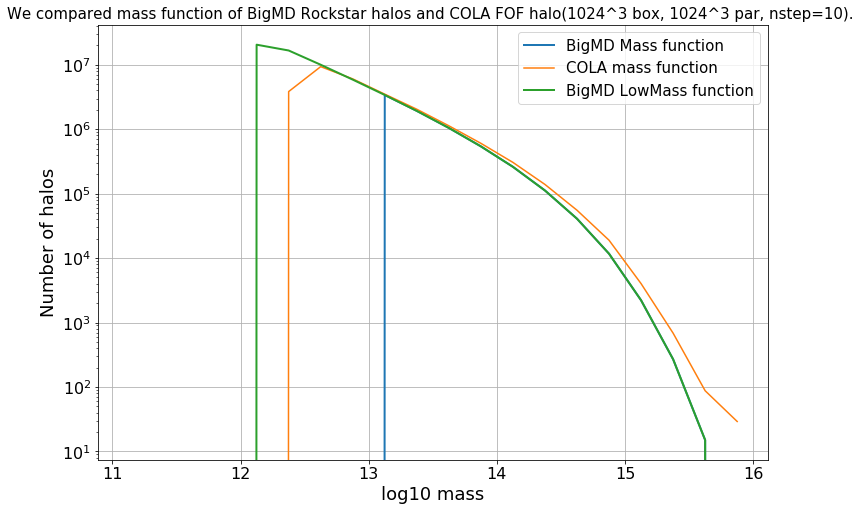

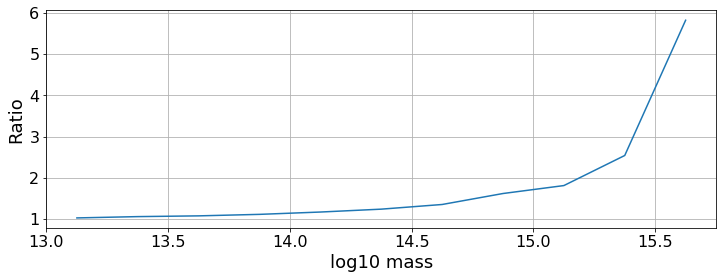

In [8]:
rlt1 = np.histogram(log10(bigmd_mass), bins = 20,  range=(11,16) );

#rlt2 = np.histogram(log10(cola_mass*(1-cola_mass**(-0.6))*m_particle_to_solar), bins = 200, range=(11,16) )
rlt2 = np.histogram(log10(cola_mass*m_particle_to_solar), bins = 20, range=(11,16) )
rlt3 = np.histogram(log10(bigmd_mass_low), bins = 20,  range=(11,16) )


fig = plt.figure(figsize=(12, 8))

ax = fig.add_subplot(111)


Y1, X1 = rlt1[0], rlt1[1]
X1 = [(X1[row]+X1[row+1])*0.5 for row in range(len(X1)-1)]
ax.plot(X1,Y1,lw=2, label='BigMD Mass function')

Y2, X2 = rlt2[0], rlt2[1]
X2 = [(X2[row]+X2[row+1])*0.5 for row in range(len(X2)-1)]
Y2 = Y2*(2500**3.)/1024**3.
ax.plot(X2,Y2, label='COLA mass function')

Y3, X3 = rlt3[0], rlt3[1]
X3 = [(X3[row]+X3[row+1])*0.5 for row in range(len(X3)-1)]
ax.plot(X3,Y3,lw=2, label='BigMD LowMass function')

ax.legend(fontsize=15)
ax.set_yscale('log')
ax.grid()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#for tick in ax.xaxis.get_major_ticks():
#    tick.label1.set_fontsize(16)
ax.set_xlabel('log10 mass', fontsize=18); ax.set_ylabel('Number of halos', fontsize=18)
#ax.set_xticklabels(list(ax.get_xticklabels()), fontsize=16)

ax.set_title('We compared mass function of BigMD Rockstar halos and COLA FOF halo(1024^3 box, 1024^3 par, nstep=10). ', fontsize=15)
plt.savefig(r'mass_function_modify.png', format='png')
plot_difference(X1, X2, Y1, Y2)

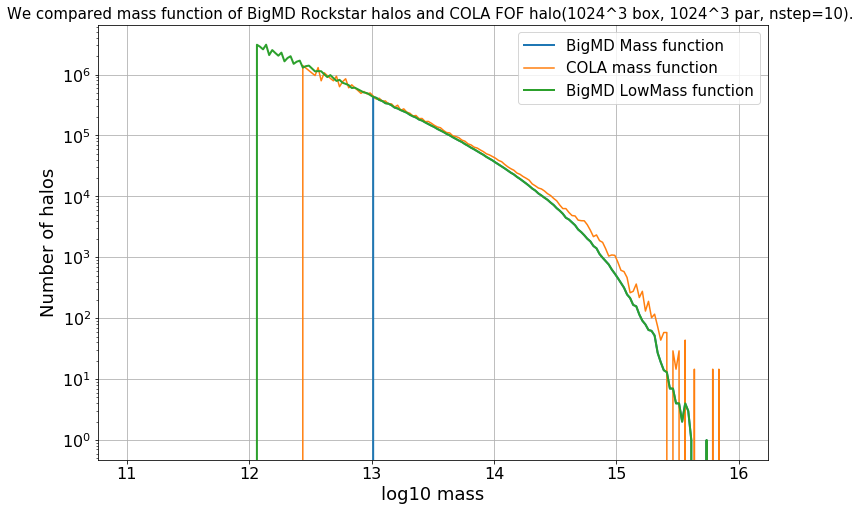

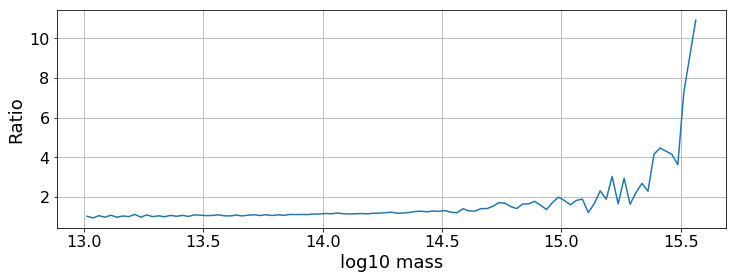

In [30]:
rlt1 = np.histogram(log10(bigmd_mass), bins = 200,  range=(11,16) );

#rlt2 = np.histogram(log10(cola_mass*(1-cola_mass**(-0.6))*m_particle_to_solar), bins = 200, range=(11,16) )
rlt2 = np.histogram(log10(cola_mass*m_particle_to_solar), bins = 200, range=(11,16) )
rlt3 = np.histogram(log10(bigmd_mass_low), bins = 200,  range=(11,16) )


fig = plt.figure(figsize=(12, 8))

ax = fig.add_subplot(111)


Y1, X1 = rlt1[0], rlt1[1]
X1 = [(X1[row]+X1[row+1])*0.5 for row in range(len(X1)-1)]
ax.plot(X1,Y1,lw=2, label='BigMD Mass function')

Y2, X2 = rlt2[0], rlt2[1]
X2 = [(X2[row]+X2[row+1])*0.5 for row in range(len(X2)-1)]
Y2 = Y2*(2500**3.)/1024**3.
ax.plot(X2,Y2, label='COLA mass function')

Y3, X3 = rlt3[0], rlt3[1]
X3 = [(X3[row]+X3[row+1])*0.5 for row in range(len(X3)-1)]
ax.plot(X3,Y3,lw=2, label='BigMD LowMass function')

ax.legend(fontsize=15)
ax.set_yscale('log')
ax.grid()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#for tick in ax.xaxis.get_major_ticks():
#    tick.label1.set_fontsize(16)
ax.set_xlabel('log10 mass', fontsize=18); ax.set_ylabel('Number of halos', fontsize=18)
#ax.set_xticklabels(list(ax.get_xticklabels()), fontsize=16)

ax.set_title('We compared mass function of BigMD Rockstar halos and COLA FOF halo(1024^3 box, 1024^3 par, nstep=10). ', fontsize=15)
plt.savefig(r'mass_function_modify.png', format='png')
plot_difference(X1, X2, Y1, Y2)

### Plot the histograms: degraded_cola_mass, 10 timesteps, 1024 box, 1024**3 particles

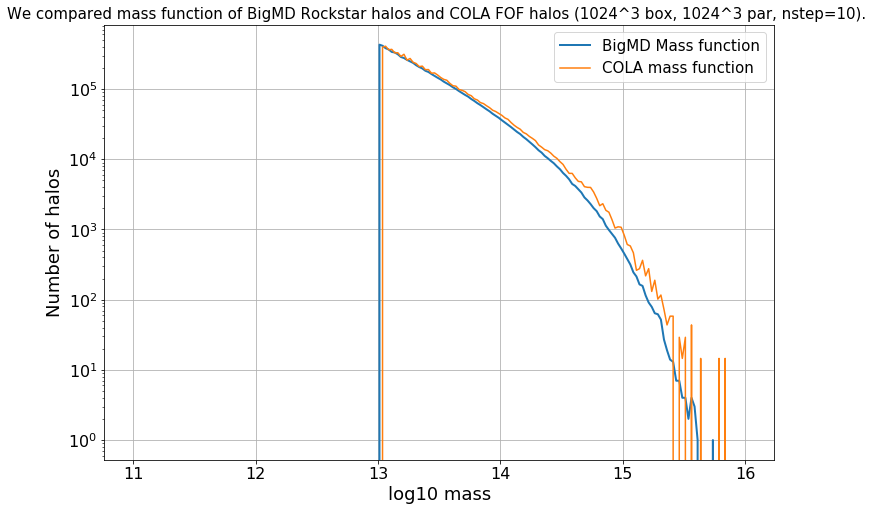

In [8]:
rlt1 = np.histogram(log10(bigmd_mass), bins = 200,  range=(11,16) );

rlt2 = np.histogram(log10(cola_degraded_mass*m_particle_to_solar), bins = 200, range=(11,16) )


fig = plt.figure(figsize=(12, 8))

ax = fig.add_subplot(111)


Y1, X1 = rlt1[0], rlt1[1]
X1 = [(X1[row]+X1[row+1])*0.5 for row in range(len(X1)-1)]
ax.plot(X1,Y1,lw=2, label='BigMD Mass function')

Y2, X2 = rlt2[0], rlt2[1]
X2 = [(X2[row]+X2[row+1])*0.5 for row in range(len(X2)-1)]
Y2 = Y2*(2500**3.)/1024**3.
ax.plot(X2,Y2, label='COLA mass function')

ax.legend(fontsize=15)
ax.set_yscale('log')
ax.grid()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#for tick in ax.xaxis.get_major_ticks():
#    tick.label1.set_fontsize(16)
ax.set_xlabel('log10 mass', fontsize=18); ax.set_ylabel('Number of halos', fontsize=18)
#ax.set_xticklabels(list(ax.get_xticklabels()), fontsize=16)

ax.set_title('We compared mass function of BigMD Rockstar halos and COLA FOF halos (1024^3 box, 1024^3 par, nstep=10). ', fontsize=15)
plt.savefig(r'cola_degraded_mass_function.png', format='png')
#plot_difference(X1, X2, Y1, Y2)


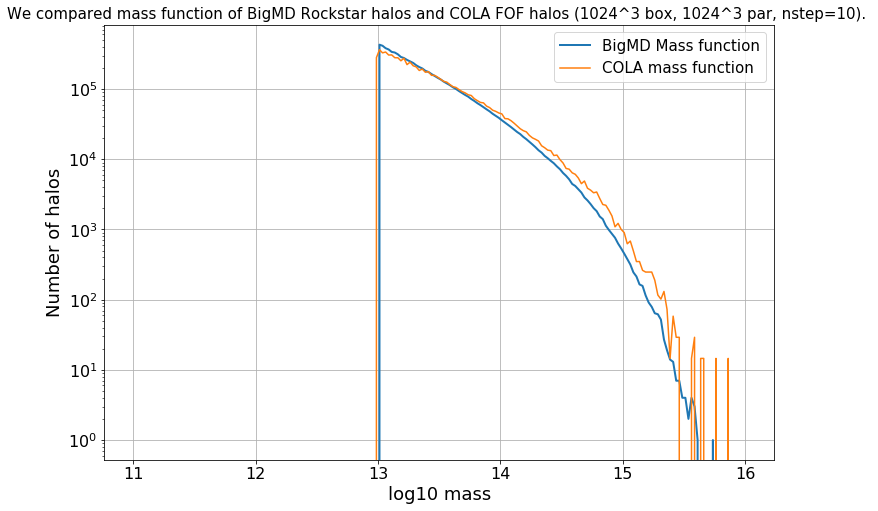

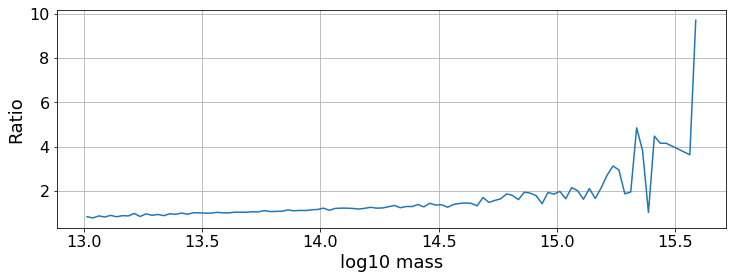

In [10]:
rlt1 = np.histogram(log10(bigmd_mass), bins = 200,  range=(11,16) );

rlt2 = np.histogram(log10(cola_degraded_mass_nstep1000*m_particle_to_solar), bins = 200, range=(11,16) )


fig = plt.figure(figsize=(12, 8))

ax = fig.add_subplot(111)


Y1, X1 = rlt1[0], rlt1[1]
X1 = [(X1[row]+X1[row+1])*0.5 for row in range(len(X1)-1)]
ax.plot(X1,Y1,lw=2, label='BigMD Mass function')

Y2, X2 = rlt2[0], rlt2[1]
X2 = [(X2[row]+X2[row+1])*0.5 for row in range(len(X2)-1)]
Y2 = Y2*(2500**3.)/1024**3.
ax.plot(X2,Y2, label='COLA mass function')

ax.legend(fontsize=15)
ax.set_yscale('log')
ax.grid()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#for tick in ax.xaxis.get_major_ticks():
#    tick.label1.set_fontsize(16)
ax.set_xlabel('log10 mass', fontsize=18); ax.set_ylabel('Number of halos', fontsize=18)
#ax.set_xticklabels(list(ax.get_xticklabels()), fontsize=16)

ax.set_title('We compared mass function of BigMD Rockstar halos and COLA FOF halos (1024^3 box, 1024^3 par, nstep=10). ', fontsize=15)
plt.savefig(r'cola_degraded_nstep1000_mass_function.png', format='png')
plot_difference(X1, X2, Y1, Y2)

### Plot the histograms: cola, 10 timesteps, 512 box, 512**3 particles

    cola_mass = np.loadtxt('/home/xiaodongli/projects/simulation/cola_output/fof00001c.txt', usecols=cola_masscol)
    cola_mass_512grid = np.loadtxt('/home/xiaodongli/projects/simulation/cola_output_512grid/fof00001c.txt', usecols=cola_masscol)
    cola_mass_nstep5 = np.loadtxt('/home/xiaodongli/projects/simulation/cola_output_nstep5/fof00001c.txt', usecols=cola_masscol)
    cola_mass_nstep20 = np.loadtxt('/home/xiaodongli/projects/simulation/cola_output_nstep20//fof00001c.txt', usecols=cola_masscol)
    cola_mass_nstep40 = np.loadtxt('/home/xiaodongli/projects/simulation/cola_output_nstep40//fof00001c.txt', usecols=cola_masscol)
    cola_mass_nstep80 = np.loadtxt('/home/xiaodongli/projects/simulation/cola_output_nstep20//fof00001c.txt', usecols=cola_masscol)

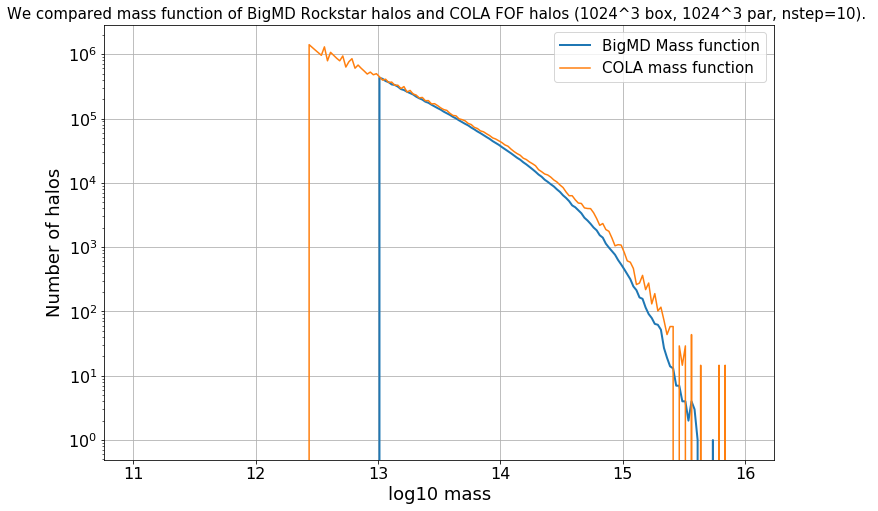

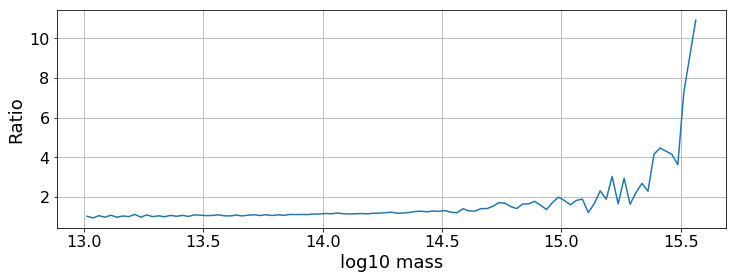

In [17]:
rlt1 = np.histogram(log10(bigmd_mass), bins = 200,  range=(11,16) );

rlt2 = np.histogram(log10(cola_mass*m_particle_to_solar), bins = 200, range=(11,16) )


fig = plt.figure(figsize=(12, 8))

ax = fig.add_subplot(111)


Y1, X1 = rlt1[0], rlt1[1]
X1 = [(X1[row]+X1[row+1])*0.5 for row in range(len(X1)-1)]
ax.plot(X1,Y1,lw=2, label='BigMD Mass function')

Y2, X2 = rlt2[0], rlt2[1]
X2 = [(X2[row]+X2[row+1])*0.5 for row in range(len(X2)-1)]
Y2 = Y2*(2500**3.)/1024**3.
ax.plot(X2,Y2, label='COLA mass function')

ax.legend(fontsize=15)
ax.set_yscale('log')
ax.grid()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#for tick in ax.xaxis.get_major_ticks():
#    tick.label1.set_fontsize(16)
ax.set_xlabel('log10 mass', fontsize=18); ax.set_ylabel('Number of halos', fontsize=18)
#ax.set_xticklabels(list(ax.get_xticklabels()), fontsize=16)

ax.set_title('We compared mass function of BigMD Rockstar halos and COLA FOF halos (1024^3 box, 1024^3 par, nstep=10). ', fontsize=15)
plt.savefig(r'mass_function.png', format='png')
plot_difference(X1, X2, Y1, Y2)


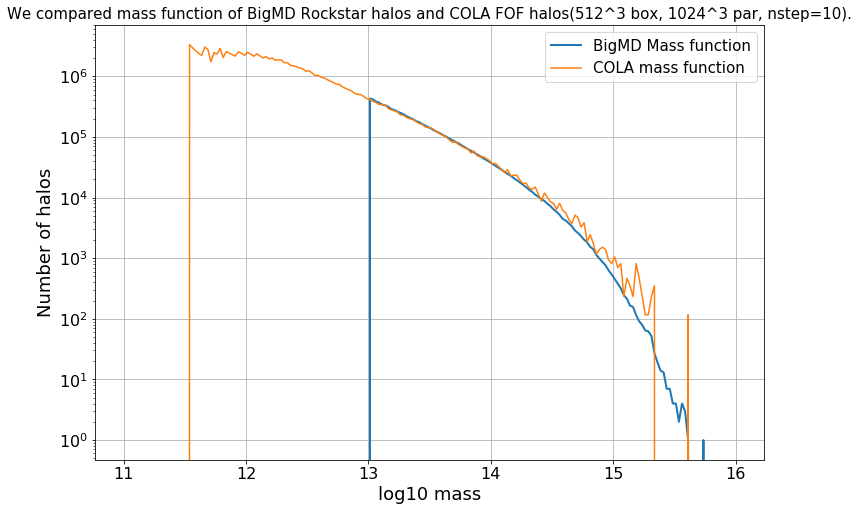

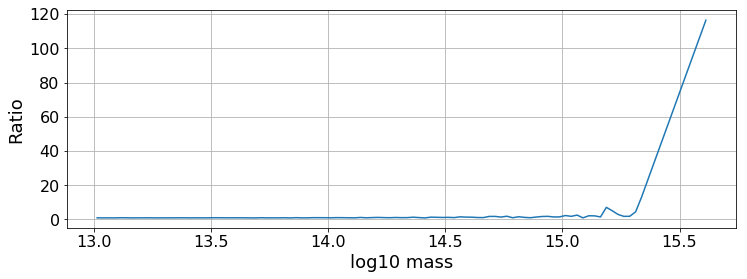

In [20]:
boxsize_512 = 512.0
Volume_512 = (boxsize_512 * Mpc)**3                                      # unit: cm^3

m_particle_512 = rhoc * omega_m * Volume_512 / (nc**3)                   # unit : g

m_particle_512_to_solar = m_particle_512 / Solar_mass


rlt1 = np.histogram(log10(bigmd_mass), bins = 200,  range=(11,16) );

rlt2 = np.histogram(log10(cola_mass_512grid*m_particle_512_to_solar), bins = 200, range=(11,16) )


fig = plt.figure(figsize=(12, 8))

ax = fig.add_subplot(111)


Y1, X1 = rlt1[0], rlt1[1]
X1 = [(X1[row]+X1[row+1])*0.5 for row in range(len(X1)-1)]
ax.plot(X1,Y1,lw=2, label='BigMD Mass function')

Y2, X2 = rlt2[0], rlt2[1]
X2 = [(X2[row]+X2[row+1])*0.5 for row in range(len(X2)-1)]
Y2 = Y2*(2500**3.)/512**3.
ax.plot(X2,Y2, label='COLA mass function')

ax.legend(fontsize=15)
ax.set_yscale('log')
ax.grid()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#for tick in ax.xaxis.get_major_ticks():
#    tick.label1.set_fontsize(16)
ax.set_xlabel('log10 mass', fontsize=18); ax.set_ylabel('Number of halos', fontsize=18)
#ax.set_xticklabels(list(ax.get_xticklabels()), fontsize=16)

ax.set_title('We compared mass function of BigMD Rockstar halos and COLA FOF halos(512^3 box, 1024^3 par, nstep=10).', fontsize=15)
plt.savefig(r'mass_function_512grid.png', format='png')
plot_difference(X1, X2, Y1, Y2)

### Plot the histograms: cola, 5 timesteps, 1024 box, 1024**3 particles

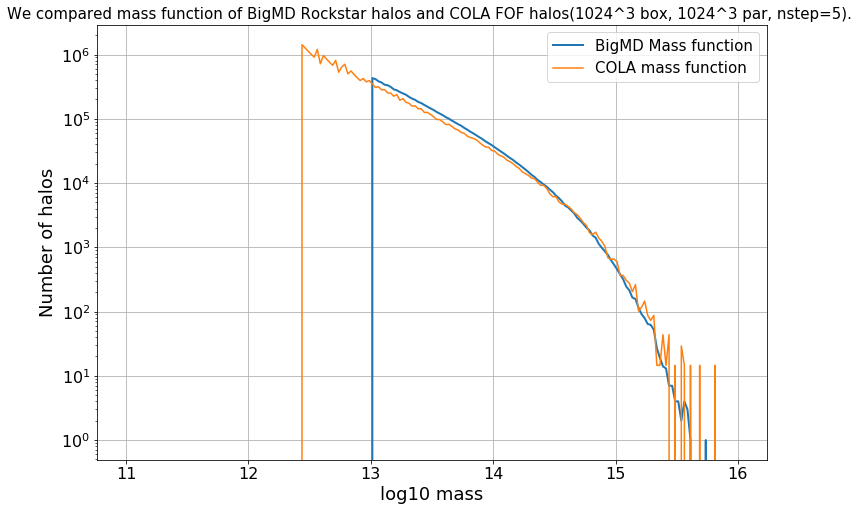

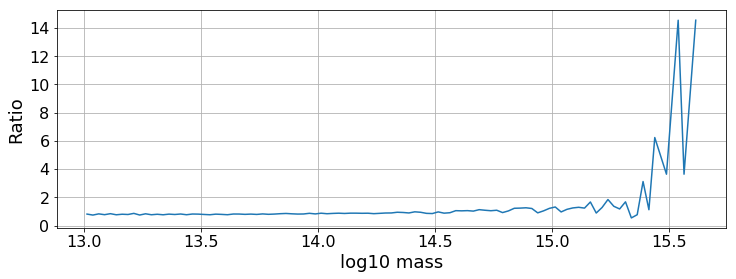

In [21]:
rlt1 = np.histogram(log10(bigmd_mass), bins = 200,  range=(11,16) );

rlt2 = np.histogram(log10(cola_mass_nstep5*m_particle_to_solar), bins = 200, range=(11,16) )


fig = plt.figure(figsize=(12, 8))

ax = fig.add_subplot(111)


Y1, X1 = rlt1[0], rlt1[1]
X1 = [(X1[row]+X1[row+1])*0.5 for row in range(len(X1)-1)]
ax.plot(X1,Y1,lw=2, label='BigMD Mass function')

Y2, X2 = rlt2[0], rlt2[1]
X2 = [(X2[row]+X2[row+1])*0.5 for row in range(len(X2)-1)]
Y2 = Y2*(2500**3.)/1024**3.
ax.plot(X2,Y2, label='COLA mass function')

ax.legend(fontsize=15)
ax.set_yscale('log')
ax.grid()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#for tick in ax.xaxis.get_major_ticks():
#    tick.label1.set_fontsize(16)
ax.set_xlabel('log10 mass', fontsize=18); ax.set_ylabel('Number of halos', fontsize=18)
#ax.set_xticklabels(list(ax.get_xticklabels()), fontsize=16)

ax.set_title('We compared mass function of BigMD Rockstar halos and COLA FOF halos(1024^3 box, 1024^3 par, nstep=5). ', fontsize=15)
plt.savefig(r'mass_function_nstep5.png', format='png')
plot_difference(X1, X2, Y1, Y2)


### Plot the histograms: cola, 20 timesteps, 1024 box, 1024**3 particles

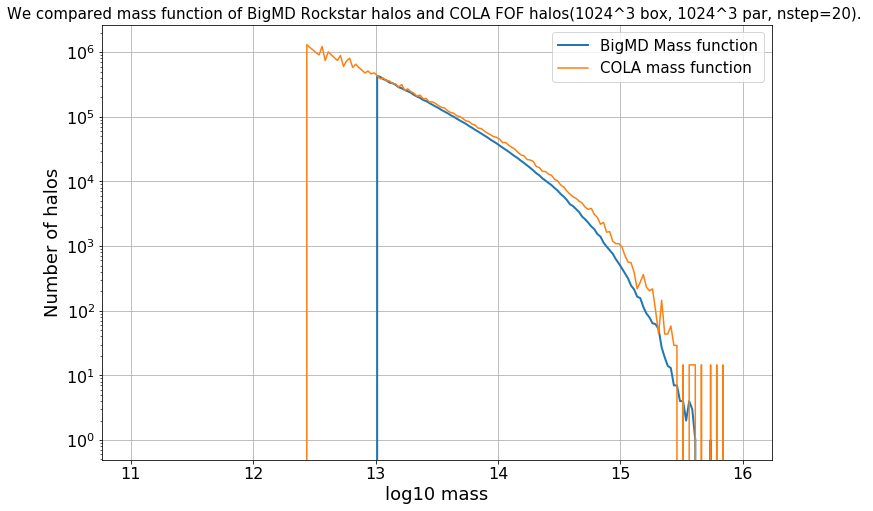

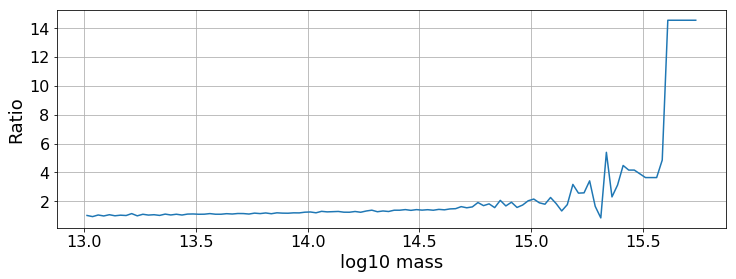

In [22]:
rlt1 = np.histogram(log10(bigmd_mass), bins = 200,  range=(11,16) );

rlt2 = np.histogram(log10(cola_mass_nstep20*m_particle_to_solar), bins = 200, range=(11,16) )


fig = plt.figure(figsize=(12, 8))

ax = fig.add_subplot(111)


Y1, X1 = rlt1[0], rlt1[1]
X1 = [(X1[row]+X1[row+1])*0.5 for row in range(len(X1)-1)]
ax.plot(X1,Y1,lw=2, label='BigMD Mass function')

Y2, X2 = rlt2[0], rlt2[1]
X2 = [(X2[row]+X2[row+1])*0.5 for row in range(len(X2)-1)]
Y2 = Y2*(2500**3.)/1024**3.
ax.plot(X2,Y2, label='COLA mass function')

ax.legend(fontsize=15)
ax.set_yscale('log')
ax.grid()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#for tick in ax.xaxis.get_major_ticks():
#    tick.label1.set_fontsize(16)
ax.set_xlabel('log10 mass', fontsize=18); ax.set_ylabel('Number of halos', fontsize=18)
#ax.set_xticklabels(list(ax.get_xticklabels()), fontsize=16)

ax.set_title('We compared mass function of BigMD Rockstar halos and COLA FOF halos(1024^3 box, 1024^3 par, nstep=20). ', fontsize=15)
plt.savefig(r'mass_function_nstep20.png', format='png')
plot_difference(X1, X2, Y1, Y2)
#plt.savefig(r'mass function.pdf', format='pdf')

### Plot the histograms: cola, 40 timesteps, 1024 box, 1024**3 particles

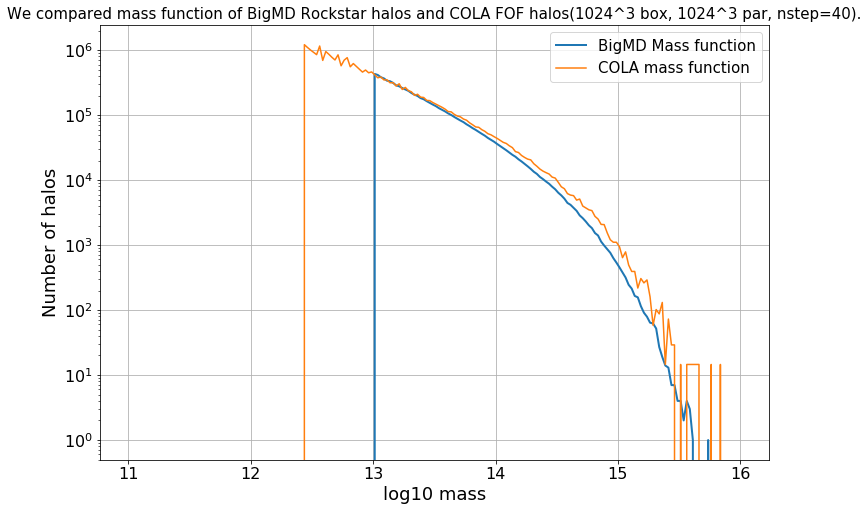

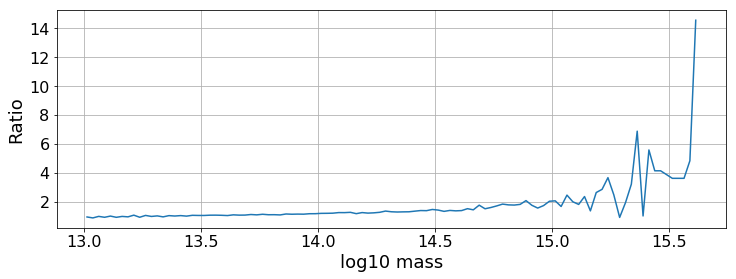

In [31]:
rlt1 = np.histogram(log10(bigmd_mass), bins = 200,  range=(11,16) );

rlt2 = np.histogram(log10(cola_mass_nstep40*m_particle_to_solar), bins = 200, range=(11,16) )


fig = plt.figure(figsize=(12, 8))

ax = fig.add_subplot(111)


Y1, X1 = rlt1[0], rlt1[1]
X1 = [(X1[row]+X1[row+1])*0.5 for row in range(len(X1)-1)]
ax.plot(X1,Y1,lw=2, label='BigMD Mass function')

Y2, X2 = rlt2[0], rlt2[1]
X2 = [(X2[row]+X2[row+1])*0.5 for row in range(len(X2)-1)]
Y2 = Y2*(2500**3.)/1024**3.
ax.plot(X2,Y2, label='COLA mass function')

ax.legend(fontsize=15)
ax.set_yscale('log')
ax.grid()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#for tick in ax.xaxis.get_major_ticks():
#    tick.label1.set_fontsize(16)
ax.set_xlabel('log10 mass', fontsize=18); ax.set_ylabel('Number of halos', fontsize=18)
#ax.set_xticklabels(list(ax.get_xticklabels()), fontsize=16)

ax.set_title('We compared mass function of BigMD Rockstar halos and COLA FOF halos(1024^3 box, 1024^3 par, nstep=40).', fontsize=15)
plt.savefig(r'mass_function_nstep40.png', format='png')
plot_difference(X1, X2, Y1, Y2)
#plt.savefig(r'mass function.pdf', format='pdf')

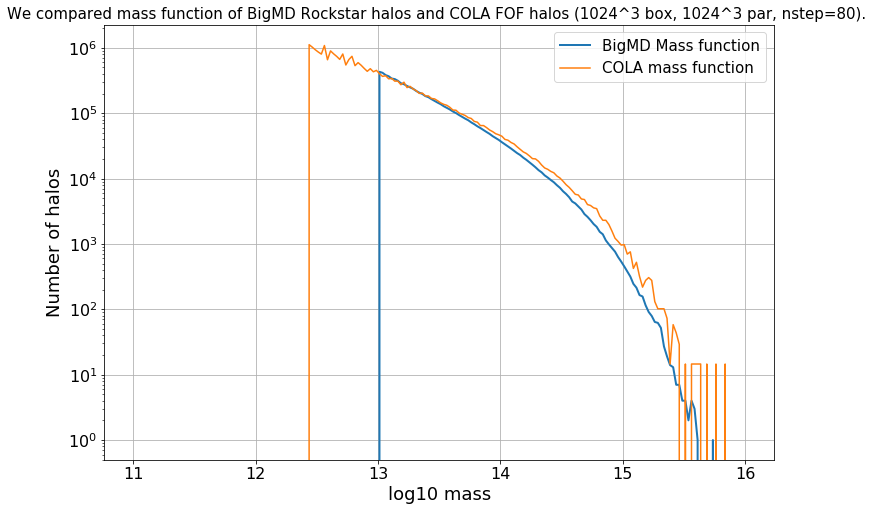

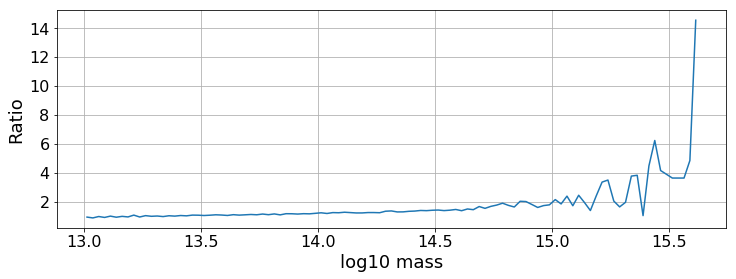

In [32]:
rlt1 = np.histogram(log10(bigmd_mass), bins = 200,  range=(11,16) );

rlt2 = np.histogram(log10(cola_mass_nstep80*m_particle_to_solar), bins = 200, range=(11,16) )


fig = plt.figure(figsize=(12, 8))

ax = fig.add_subplot(111)


Y1, X1 = rlt1[0], rlt1[1]
X1 = [(X1[row]+X1[row+1])*0.5 for row in range(len(X1)-1)]
ax.plot(X1,Y1,lw=2, label='BigMD Mass function')

Y2, X2 = rlt2[0], rlt2[1]
X2 = [(X2[row]+X2[row+1])*0.5 for row in range(len(X2)-1)]
Y2 = Y2*(2500**3.)/1024**3.
ax.plot(X2,Y2, label='COLA mass function')

ax.legend(fontsize=15)
ax.set_yscale('log')
ax.grid()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#for tick in ax.xaxis.get_major_ticks():
#    tick.label1.set_fontsize(16)
ax.set_xlabel('log10 mass', fontsize=18); ax.set_ylabel('Number of halos', fontsize=18)
#ax.set_xticklabels(list(ax.get_xticklabels()), fontsize=16)

ax.set_title('We compared mass function of BigMD Rockstar halos and COLA FOF halos (1024^3 box, 1024^3 par, nstep=80). ', fontsize=15)
plt.savefig(r'mass_function_nstep80.png', format='png')
plot_difference(X1, X2, Y1, Y2)
#plt.savefig(r'mass function.pdf', format='pdf')